## ANÁLISIS BASE DE DATOS 

In [ ]:
import pandas as pd
import sqlite3
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# PROSIGUE LA LIMPIEZA 

In [3]:
df=pd.read_csv("agostoALIME_SIN_PERC.csv", sep=',')

In [4]:
df.shape

(4725799, 10)

Se tienen 4.725.799 filas de productos que son alimentos. 

In [5]:
urlUnique=pd.unique(df['url'])
urlUnique.size

28782

En concreto, 28.782 alimentos diferentes se encuentran entre los 3 supermercados.

### VALORES ERRONEOS EN PRICE

In [6]:
df["price"].describe() 

count    4.725799e+06
mean     4.868025e+00
std      6.295649e+01
min      8.000000e-02
25%      1.190000e+00
50%      1.890000e+00
75%      3.000000e+00
max      7.915050e+03
Name: price, dtype: float64

Llama la atención los precios del alimento más barato y del más caro. Se realizan gráficas para buscar valores erróneos.

AxesSubplot(0.125,0.125;0.775x0.755)


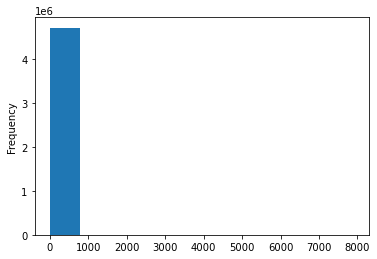

In [7]:
histogram = df['price'].plot.hist()
print(histogram)
plt.show()

El histograma ofrece poca información. Se ve que el mayor porcentaje de precios de los productos se encuentra entre el [0,750] aproximadamente.

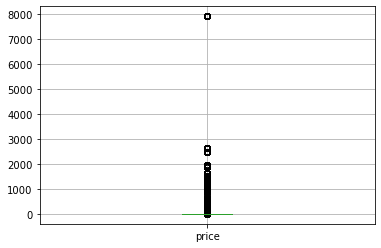

In [8]:
boxplot = df.boxplot(column=['price'])
boxplot.plot()

plt.show()

El boxplot muestra que claramente algunos valores de la variable precio, como el 8000, son valores erróneos.

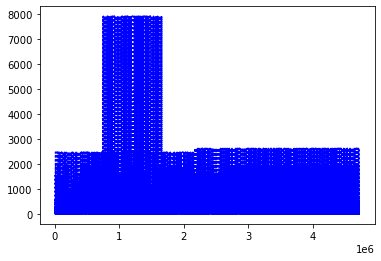

In [9]:
plt.plot(df['price'], ":",color="b")

La última gráfica tampoco no es de mucha utilidad, ya que al tener tantos elementos es difícil observar conclusiones. Por ello, vamos a trabajar con los percentiles

###### PERCENTIL 99

In [10]:
df.price.quantile(0.99) #PERCENTIL 99

19.19

El percentil 99 es una medida de posición que indica que el 99% de los precios son menores a 19'19€. Como 19'19€ ya si es un precio que se puede encontrar en un supermercado nos quedamos este máximo.

In [11]:
df=df.drop(df[df['price']>19.19].index) #ELIMINAMOS LOS ELEMENTOS CON UN PRECIO MAYORES AL PERCENTIL 99

###### PERCENTIL 1

In [12]:
df.price.quantile(0.01) #PERCENTIL 1

0.3

El percentil 1 es una medida de posición que indica, una vez ordenados los datos de menor a mayor, que el 1% de los precios son menores a 0.3.

In [13]:
df=df.drop(df[df['price']<0.3].index) #ELIMINAMOS ELEMENTOS CON UN PRECIO MENOR AL PERCENTIL 1

In [14]:
df.describe()

,Unnamed: 0,price,reference_price
count,4.636221e+06,4.636221e+06,4.636221e+06
mean,3.916674e+06,2.616193e+00,1.088053e+01
std,2.237598e+06,2.412164e+00,1.324324e+02
min,1.000000e+00,3.000000e-01,8.000000e-03
25%,2.002041e+06,1.200000e+00,2.420000e+00
50%,3.900103e+06,1.890000e+00,5.341000e+00
75%,5.849146e+06,2.990000e+00,9.950000e+00
max,7.801573e+06,1.919000e+01,1.663333e+04


#### VARIABLE REFERENCE_PRICE

In [15]:
df["reference_price"].describe() 

count    4.636221e+06
mean     1.088053e+01
std      1.324324e+02
min      8.000000e-03
25%      2.420000e+00
50%      5.341000e+00
75%      9.950000e+00
max      1.663333e+04
Name: reference_price, dtype: float64

Se vuelve a tener máximos y mínimos extraños para precios de supermercado

In [16]:
df.reference_price.quantile(0.99) #PERCENTIL 99

55.63000000000001

In [17]:
#ELIMINAMOS DICHOS ELEMENTOS
df=df.drop(df[df['reference_price']>55.63].index) 

In [18]:
df.reference_price.quantile(0.01) #PERCENTIL 1

0.24

In [19]:
#ELIMINAMOS DICHOS ELEMENTOS
df =df.drop(df[df['reference_price']<0.24].index)


In [21]:
df.describe()

,Unnamed: 0,price,reference_price
count,4.545448e+06,4.545448e+06,4.545448e+06
mean,3.915682e+06,2.613899e+00,7.476211e+00
std,2.237302e+06,2.416155e+00,7.351006e+00
min,1.000000e+00,3.000000e-01,2.400000e-01
25%,2.001550e+06,1.200000e+00,2.480000e+00
50%,3.898880e+06,1.890000e+00,5.340000e+00
75%,5.847842e+06,2.990000e+00,9.850000e+00
max,7.801573e+06,1.919000e+01,5.563000e+01


In [22]:
df.shape

(4545448, 10)

### TRANSFORMACIÓN UNIDADES DE MEDIDA Y ELECCIÓN DE FECHA

TOMAMOS LA ÚLTIMA ACTUALIZACION DE CADA PRODUCTO

In [23]:
urlUnique=pd.unique(df['url'])
urlUnique.size

27595

In [24]:
df=df.drop_duplicates(subset=['url'], keep='last', inplace=False, ignore_index=False)

In [25]:
df.shape

(27595, 10)

In [26]:
#BORRAR, NO SON COMIDA
df=df.drop(df[df['reference_unit']=='m'].index) 
df=df.drop(df[df['reference_unit']=='lavado'].index) 
df=df.drop(df[df['reference_unit']=='100ml'].index) 

In [193]:
###### GUARDAR 
#df.to_csv('agostoALIME_CON_PERC.csv', sep=',')
df=pd.read_csv("agostoALIME_CON_PERC.csv", sep=',')

Pasamos los 100g a kg, para poder hacer comparaciones entre los precios.

In [194]:
for i, valor in enumerate(df['reference_unit']):
    if valor=="100g":
        df['reference_price'][i]=df['reference_price'][i]*10

<ipython-input-194-1c21b9d3349d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reference_price'][i]=df['reference_price'][i]*10


In [195]:
df=df.replace({"100g":"kg"})

Pasamos los g a kg, para poder hacer comparaciones entre los precios.

In [196]:
for i, valor in enumerate(df['reference_unit']):
    if valor=="g":
        df['reference_price'][i]=df['reference_price'][i]*1000

<ipython-input-196-7f513013e75b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reference_price'][i]=df['reference_price'][i]*1000


In [197]:
df=df.replace({"g":"kg"})

COMPROBAMOS QUE CON LOS CAMBIOS NO TENEMOS VALORES MUY ALTOS EN REFERENCE_PRICE

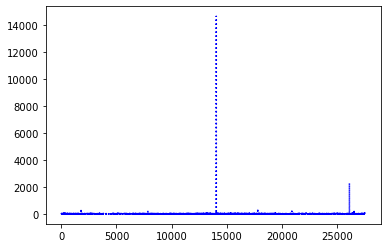

In [198]:
plt.plot(df['reference_price'], ":",color="b")

BORRAMOS LOS VALORES MAYORES QUE 60

In [199]:
df=df.drop(df[df['reference_price']>60].index) 

Nos quedamos únicamente con los alimentos con fecha del 15-06-2022 al 15-08-2022

In [200]:
df.shape

(27566, 11)

In [201]:
df=df[(df['insert_date'] == '2022-08-01 00:00:00') | (df['insert_date'] == '2022-08-02 00:00:00')| (df['insert_date'] == '2022-08-03 00:00:00')| (df['insert_date'] == '2022-08-04 00:00:00')| (df['insert_date'] == '2022-08-05 00:00:00')| (df['insert_date'] == '2022-08-06 00:00:00')| (df['insert_date'] == '2022-08-07 00:00:00')| (df['insert_date'] == '2022-08-08 00:00:00')| (df['insert_date'] == '2022-08-09 00:00:00')| (df['insert_date'] == '2022-08-10 00:00:00')| (df['insert_date'] == '2022-08-11 00:00:00')| (df['insert_date'] == '2022-08-12 00:00:00')| (df['insert_date'] == '2022-08-13 00:00:00')| (df['insert_date'] == '2022-08-14 00:00:00')| (df['insert_date'] == '2022-08-15 00:00:00')| (df['insert_date'] == '2022-07-31 00:00:00')| (df['insert_date'] == '2022-07-30 00:00:00')| (df['insert_date'] == '2022-07-29 00:00:00')| (df['insert_date'] == '2022-07-28 00:00:00')| (df['insert_date'] == '2022-07-27 00:00:00')| (df['insert_date'] == '2022-07-26 00:00:00')| (df['insert_date'] == '2022-07-25 00:00:00')| (df['insert_date'] == '2022-07-24 00:00:00')| (df['insert_date'] == '2022-07-23 00:00:00')| (df['insert_date'] == '2022-07-22 00:00:00')| (df['insert_date'] == '2022-07-21 00:00:00')| (df['insert_date'] == '2022-07-20 00:00:00')| (df['insert_date'] == '2022-07-19 00:00:00')| (df['insert_date'] == '2022-07-18 00:00:00')| (df['insert_date'] == '2022-07-17 00:00:00')| (df['insert_date'] == '2022-07-16 00:00:00')| (df['insert_date'] == '2022-07-15 00:00:00')| (df['insert_date'] == '2022-07-14 00:00:00')| (df['insert_date'] == '2022-07-13 00:00:00')| (df['insert_date'] == '2022-07-12 00:00:00')| (df['insert_date'] == '2022-07-11 00:00:00')| (df['insert_date'] == '2022-07-10 00:00:00')| (df['insert_date'] == '2022-07-09 00:00:00')| (df['insert_date'] == '2022-07-08 00:00:00')| (df['insert_date'] == '2022-07-07 00:00:00')| (df['insert_date'] == '2022-07-06 00:00:00')| (df['insert_date'] == '2022-07-05 00:00:00')| (df['insert_date'] == '2022-07-04 00:00:00')| (df['insert_date'] == '2022-07-03 00:00:00')| (df['insert_date'] == '2022-07-02 00:00:00')| (df['insert_date'] == '2022-07-01 00:00:00')| (df['insert_date'] == '2022-06-30 00:00:00')| (df['insert_date'] == '2022-06-29 00:00:00')| (df['insert_date'] == '2022-06-28 00:00:00')| (df['insert_date'] == '2022-06-27 00:00:00')| (df['insert_date'] == '2022-06-26 00:00:00')| (df['insert_date'] == '2022-06-25 00:00:00')| (df['insert_date'] == '2022-06-24 00:00:00')| (df['insert_date'] == '2022-06-23 00:00:00')| (df['insert_date'] == '2022-06-22 00:00:00')| (df['insert_date'] == '2022-06-21 00:00:00')| (df['insert_date'] == '2022-06-20 00:00:00')| (df['insert_date'] == '2022-06-19 00:00:00')| (df['insert_date'] == '2022-06-18 00:00:00')| (df['insert_date'] == '2022-06-17 00:00:00')| (df['insert_date'] == '2022-06-16 00:00:00')| (df['insert_date'] == '2022-06-15 00:00:00')]

In [202]:
df.shape

(11439, 11)

Comprobamos que en todas las categorías se tenga un número elevado de productos. 

In [203]:
df[(df['category'] == 'agua')].shape

(132, 11)

In [204]:
df[(df['category'] == 'fruta')].shape

(301, 11)

In [205]:
df[(df['category'] == 'verduras')].shape

(692, 11)

In [206]:
df[(df['category'] == 'cereales')].shape

(226, 11)

In [207]:
df[(df['category'] == 'pan')].shape

(301, 11)

In [208]:
df[(df['category'] == 'frutos_secos')].shape

(99, 11)

In [209]:
df[(df['category'] == 'legumbres')].shape

(132, 11)

In [210]:
df[(df['category'] == 'AOVE')].shape

(0, 11)

In [211]:
df[(df['category'] == 'aceite_vinagre')].shape

(122, 11)

In [212]:
df[(df['category'] == 'huevos')].shape

(42, 11)

In [213]:
df[(df['category'] == 'leche')].shape

(106, 11)

In [214]:
df[(df['category'] == 'mantequilla')].shape

(94, 11)

In [215]:
df[(df['category'] == 'pescado_marisco')].shape

(644, 11)

In [216]:
df[(df['category'] == 'carne_blanca')].shape

(106, 11)

In [217]:
df[(df['category'] == 'carne_roja')].shape

(168, 11)

In [218]:
df[(df['category'] == 'carne_roja_blanca')].shape

(167, 11)

In [219]:
df[(df['category'] == 'azucar')].shape

(200, 11)

In [220]:
df[(df['category'] == 'especias')].shape

(128, 11)

In [221]:
df[(df['category'] == 'harina')].shape

(186, 11)

In [222]:
df[(df['category'] == 'refrescos')].shape

(500, 11)

In [223]:
df[(df['category'] == 'te_cafe')].shape

(257, 11)

In [224]:
df[(df['category'] == 'merienda')].shape

(417, 11)

In [225]:
df[(df['category'] == 'bolleria')].shape

(325, 11)

In [226]:
df[(df['category'] == 'chocolate')].shape

(635, 11)

In [227]:
df[(df['category'] == 'snacks')].shape

(447, 11)

In [228]:
df[(df['category'] == 'embutido')].shape

(565, 11)

In [229]:
df[(df['category'] == 'zumo')].shape

(230, 11)

In [230]:
df[(df['category'] == 'alcohol')].shape

(1270, 11)

In [231]:
df[(df['category'] == 'postre')].shape

(281, 11)

In [232]:
df[(df['category'] == 'yogures')].shape

(609, 11)

In [233]:
df[(df['category'] == 'precocinado')].shape

(564, 11)

In [234]:
df[(df['category'] == 'sopas')].shape

(111, 11)

In [245]:
df[(df['category'] == 'helados')].shape

(328, 9)

In [237]:
df[(df['category'] == 'salsas')].shape

(237, 11)

In [238]:
df[(df['category'] == 'quesos')].shape

(817, 11)

Comprobamos los alimentos que se han eliminado

In [239]:
df.shape

(11439, 11)

In [240]:
Unique=pd.unique(df['insert_date'])
Unique

array(['2022-06-15 00:00:00', '2022-06-16 00:00:00',
       '2022-06-17 00:00:00', '2022-06-18 00:00:00',
       '2022-06-19 00:00:00', '2022-06-20 00:00:00',
       '2022-06-21 00:00:00', '2022-06-22 00:00:00',
       '2022-06-23 00:00:00', '2022-06-24 00:00:00',
       '2022-06-25 00:00:00', '2022-06-26 00:00:00',
       '2022-06-27 00:00:00', '2022-06-28 00:00:00',
       '2022-06-29 00:00:00', '2022-06-30 00:00:00',
       '2022-07-01 00:00:00', '2022-07-02 00:00:00',
       '2022-07-03 00:00:00', '2022-07-04 00:00:00',
       '2022-07-05 00:00:00', '2022-07-06 00:00:00',
       '2022-07-07 00:00:00', '2022-07-08 00:00:00',
       '2022-07-09 00:00:00', '2022-07-10 00:00:00',
       '2022-07-11 00:00:00', '2022-07-12 00:00:00',
       '2022-07-13 00:00:00', '2022-07-14 00:00:00',
       '2022-07-15 00:00:00', '2022-07-16 00:00:00',
       '2022-07-17 00:00:00', '2022-07-18 00:00:00',
       '2022-07-19 00:00:00', '2022-07-20 00:00:00',
       '2022-07-21 00:00:00', '2022-07-22 00:0

In [241]:
del(df['Unnamed: 0'])

In [242]:
del(df['Unnamed: 0.1'])

### Convertir la variable reference_unit y category a numerica

In [173]:
df=df.replace({'l':0, 'kg':1, 'ud':2, 'docena':3})

In [174]:
df=df.replace({'agua':0, 'azucar':1, 'AOVE':2, 'especias':3, 'carne_roja_blanca':4, 'harina':5, 'fruta':6, 'verduras':7, 'cereales':8, 'pan':9, 'frutos_secos':10, 'legumbres':11, 'aceite_vinagre':12, 'huevos':13, 'leche':14, 'mantequilla':15, 'quesos':16, 'pescado_marisco':17, 'carne_blanca':18, 'carne_roja':19, 'embutido':20, 'refrescos':21, 'te_cafe':22, 'merienda':23, 'bolleria':24, 'chocolate':25, 'snacks':26, 'zumo':27, 'alcohol':28, 'postre':29, 'yogures':30, 'precocinado':31, 'sopas':32, 'salsas':33, 'helados':34})

In [175]:
df.describe()

,category,price,reference_price,reference_unit
count,11439.000000,11439.000000,11439.000000,11439.000000
mean,20.137687,2.977071,8.641229,0.795437
std,9.135562,2.707400,8.182828,0.493649
min,0.000000,0.300000,0.240000,0.000000
25%,15.000000,1.370000,2.863500,1.000000
50%,21.000000,2.120000,6.260000,1.000000
75%,28.000000,3.450000,11.620000,1.000000
max,34.000000,19.150000,57.700000,3.000000


In [177]:
###### GUARDAR 
#df.to_csv('agosto_FINAL.csv', sep=',')
df=pd.read_csv("agosto_FINAL.csv", sep=',')

In [179]:
del(df['Unnamed: 0'])

### TOMAMOS 4 DATASET, DEPENDIENDO DE REFERENCE_UNIT

In [180]:
df.describe()

,category,price,reference_price,reference_unit
count,11439.000000,11439.000000,11439.000000,11439.000000
mean,20.137687,2.977071,8.641229,0.795437
std,9.135562,2.707400,8.182828,0.493649
min,0.000000,0.300000,0.240000,0.000000
25%,15.000000,1.370000,2.863500,1.000000
50%,21.000000,2.120000,6.260000,1.000000
75%,28.000000,3.450000,11.620000,1.000000
max,34.000000,19.150000,57.700000,3.000000


In [181]:
litros=df[(df['reference_unit'] ==0 )]

In [182]:
litros.to_csv('litros.csv', sep=',')

In [183]:
kilogramos=df[(df['reference_unit'] ==1 )]

In [184]:
kilogramos.to_csv('kilogramos.csv', sep=',')

In [185]:
unidad=df[(df['reference_unit'] ==2 )]

In [186]:
unidad.to_csv('unidad.csv', sep=',')

In [187]:
docena=df[(df['reference_unit'] ==3 )]

In [188]:
docena.to_csv('docena.csv', sep=',')

### GRÁFICAS

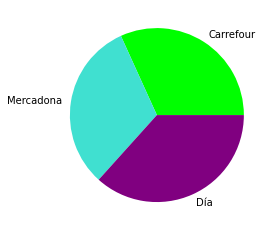

In [189]:
f=df[df["supermarket"]=='carrefour-es'].shape
f1=f[0] 

m=df[df["supermarket"]=='mercadona-es'].shape
m1=m[0]

e=df[df["supermarket"]=='dia-es'].shape
e1=e[0]

divisiones=np.array([f1,m1, e1])
actividades=np.array(['Carrefour', 'Mercadona', 'Día'])
colores=np.array(['lime','turquoise', 'purple'])
plt.pie(divisiones, labels=actividades, colors=colores)
plt.show()

Existe más cantidad de alimentos en el Mercadona y en el Día que en el carrefour

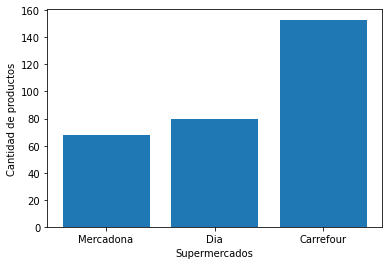

In [83]:
a=df[(df['supermarket'] == "mercadona-es") & (df['category'] =='fruta')].count()
a1=a[0]
b=df[(df['supermarket'] == "dia-es") & (df['category'] =='fruta')].count()
b1=b[0]
c=df[(df['supermarket'] == "carrefour-es") & (df['category'] =='fruta')].count()
c1=c[0]


eje_x = ['Mercadona', 'Dia', 'Carrefour']
eje_y = [a1,b1,c1]
plt.bar(eje_x, eje_y)
plt.ylabel('Cantidad de productos')
plt.xlabel('Supermercados')

plt.show()

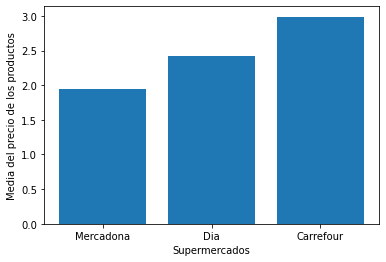

In [84]:
a=df[(df['supermarket'] == "mercadona-es") & (df['category'] =='fruta')].mean()
a1=a[1]
b=df[(df['supermarket'] == "dia-es") & (df['category'] =='fruta')].mean()
b1=b[1]
c=df[(df['supermarket'] == "carrefour-es") & (df['category'] =='fruta')].mean()
c1=c[1]

eje_x = ['Mercadona', 'Dia', 'Carrefour']
eje_y = [a1,b1,c1]
plt.bar(eje_x, eje_y)
plt.ylabel('Media del precio de los productos')
plt.xlabel('Supermercados')

plt.show()